# Home Loan Prediction

(https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python)

In [97]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
# reading data
train= pd.read_csv('train_ctrUa4K.csv')
test= pd.read_csv('test_lAUu6dG.csv')

# Making copy so original is not changed
train_original = train.copy()
test_original = test.copy()

In [12]:
train.shape

(614, 13)

In [13]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
test.shape

(367, 12)

In [14]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# checking for na values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Univariate Analysis

In [18]:
train['Loan_Status'].value_counts(normalize= True) # freq table of target variable (normalise gives proportions instead of no.s)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

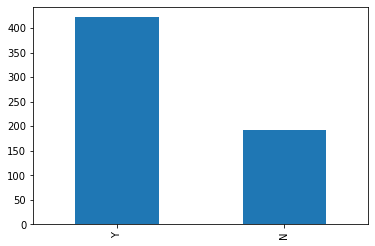

In [19]:
train['Loan_Status'].value_counts().plot.bar()

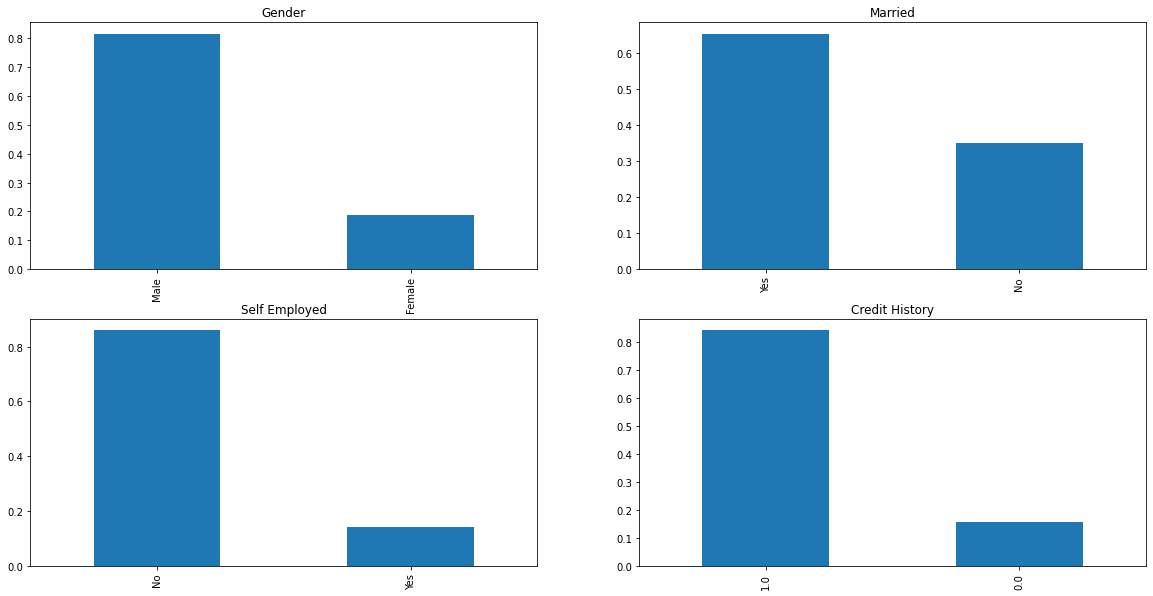

In [22]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize= True).plot.bar(figsize= (20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize= True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize= True).plot.bar(title= 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize= True).plot.bar(title= 'Credit History')
plt.show()

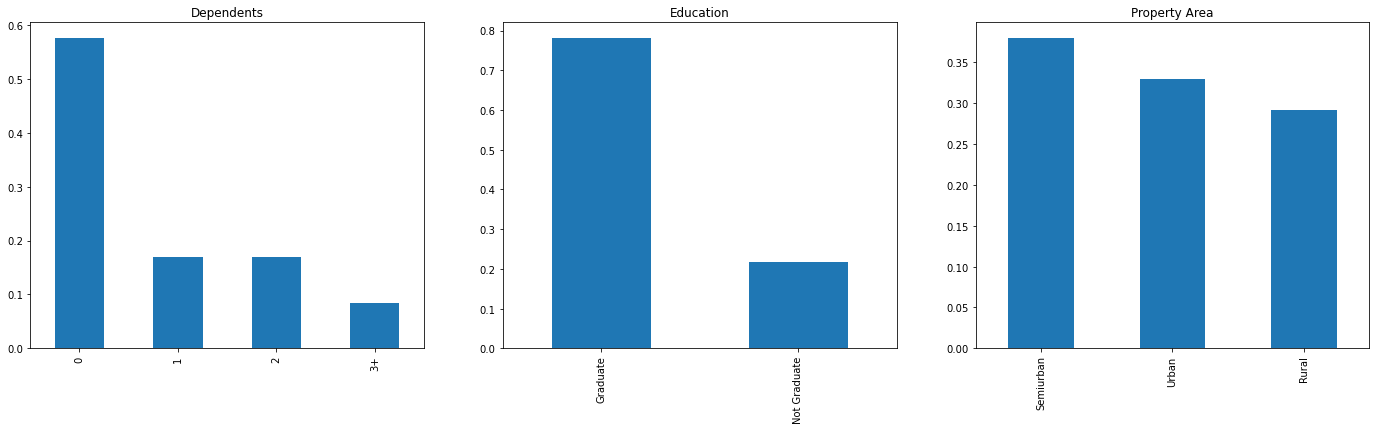

In [23]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize= True).plot.bar(figsize= (24,6), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize= True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize= True).plot.bar(title= 'Property Area')
plt.show()

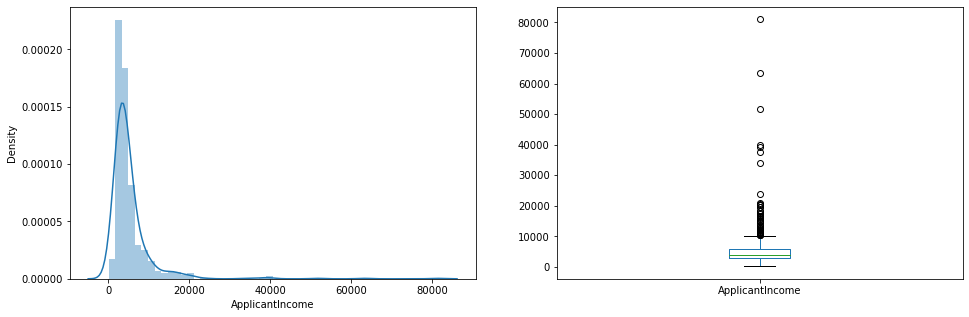

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize= (16,5))
plt.show()

Text(0.5, 0.98, '')

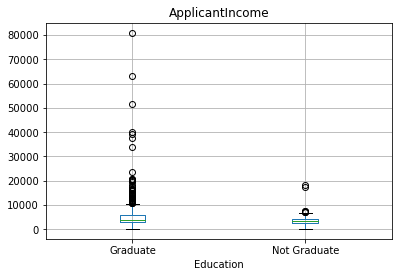

In [31]:
# Segregating Aplicant Income by Education
train.boxplot(column= 'ApplicantIncome', by= 'Education')
plt.suptitle("")

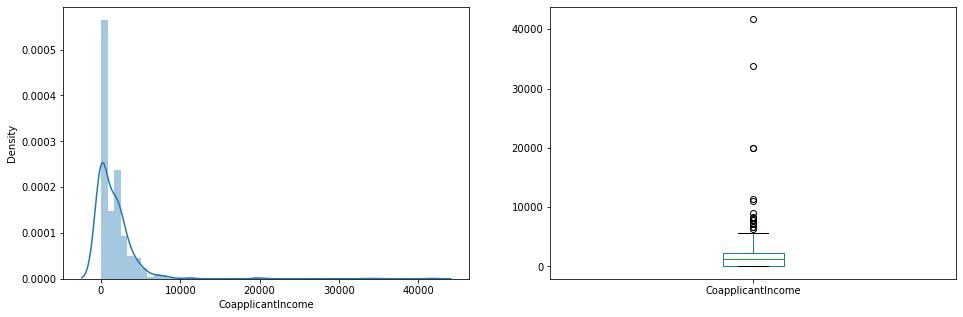

In [32]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize= (16,5))
plt.show()

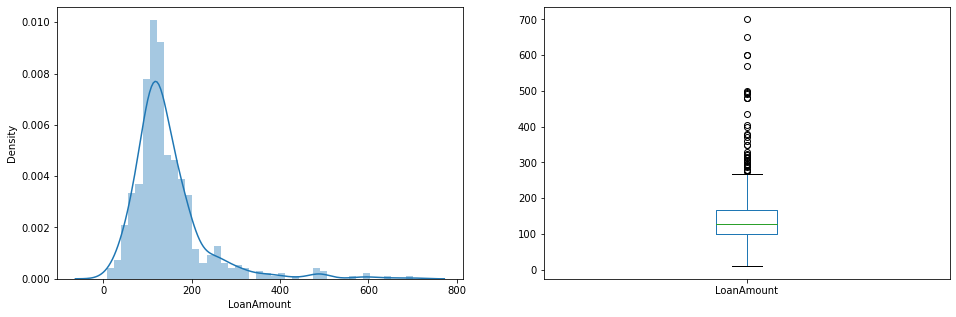

In [33]:
plt.figure(1)
plt.subplot(121)
df= train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize= (16,5))
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

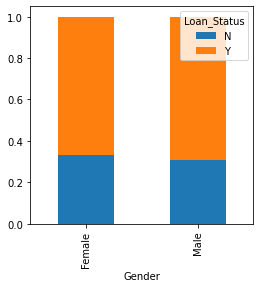

In [34]:
Gender= pd.crosstab(train['Gender'], train['Loan_Status']) # Crosstab is like pivot table
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4)) #.div does element by element floating division of dataframe

<AxesSubplot:xlabel='Married'>

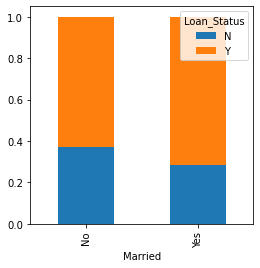

In [36]:
Married= pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<AxesSubplot:xlabel='Dependents'>

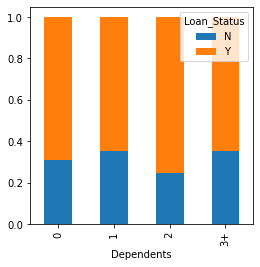

In [37]:
Dependents= pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<AxesSubplot:xlabel='Education'>

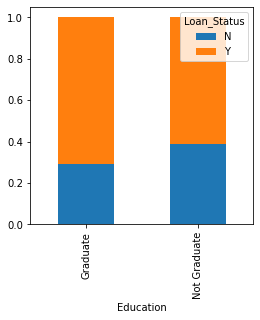

In [38]:
Education= pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<AxesSubplot:xlabel='Self_Employed'>

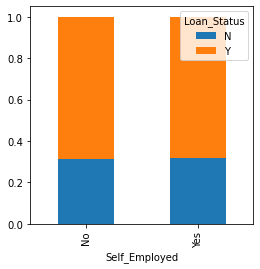

In [39]:
Self_Employed= pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<AxesSubplot:xlabel='Credit_History'>

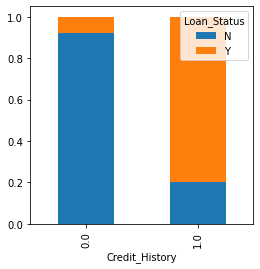

In [40]:
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<AxesSubplot:xlabel='Property_Area'>

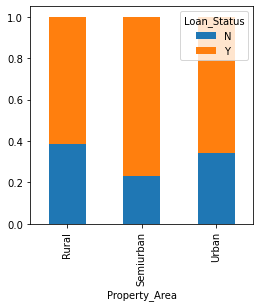

In [41]:
Property_Area= pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True, figsize= (4,4))

<AxesSubplot:xlabel='Loan_Status'>

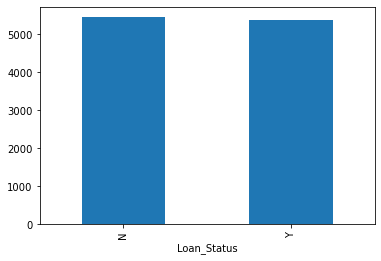

In [42]:
# Mean income of people by loan status
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

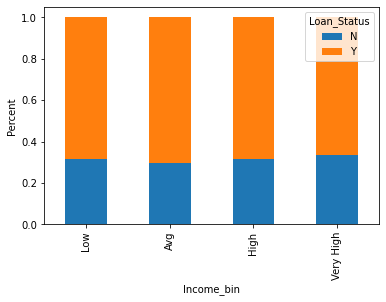

In [43]:
# making bins of applicant income variable
bins= [0,2500,4000,6000,81000]
group=['Low', 'Avg', 'High', 'Very High']
train['Income_bin']= pd.cut(train['ApplicantIncome'],bins,labels= group)
Income_bin= pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
P= plt.ylabel('Percent')

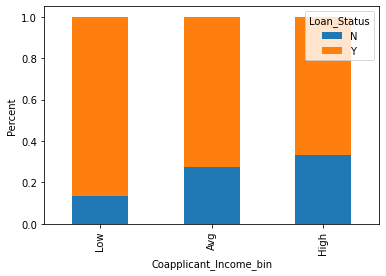

In [44]:
# Analysis of co-applicant income
bins= [0,1000,3000,42000]
group=['Low', 'Avg', 'High']
train['Coapplicant_Income_bin']= pd.cut(train['CoapplicantIncome'],bins,labels= group)
Coapplicant_Income_bin= pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
P= plt.ylabel('Percent')

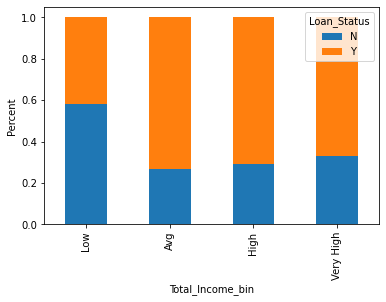

In [45]:
# Combining Applicant's and Coapplicant's Income to see combined effect
train['Total_Income']= train['ApplicantIncome'] + train['CoapplicantIncome']
bins= [0,2500,4000,6000,81000]
group=['Low', 'Avg', 'High', 'Very High']
train['Total_Income_bin']= pd.cut(train['Total_Income'],bins,labels= group)
Total_Income_bin= pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
P= plt.ylabel('Percent')

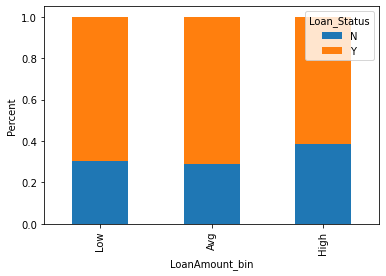

In [46]:
# Analysis by Loan Amount
bins= [0,100,200,700]
group=['Low', 'Avg', 'High']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'],bins,labels= group)
LoanAmount_bin= pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked= True)
P= plt.ylabel('Percent')

In [48]:
# Dropping the bins created earlier
train= train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income', 'LoanAmount_bin'], axis=1)

In [49]:
# Replacing 3+ in dependent variable to 3 to make it numeric
train['Dependents'].replace('3+',3,inplace= True)
test['Dependents'].replace('3+',3,inplace= True)

In [51]:
# changing target variable categories to 0 & 1
train['Loan_Status'].replace('N',0,inplace= True)
train['Loan_Status'].replace('Y',1,inplace= True)

<AxesSubplot:>

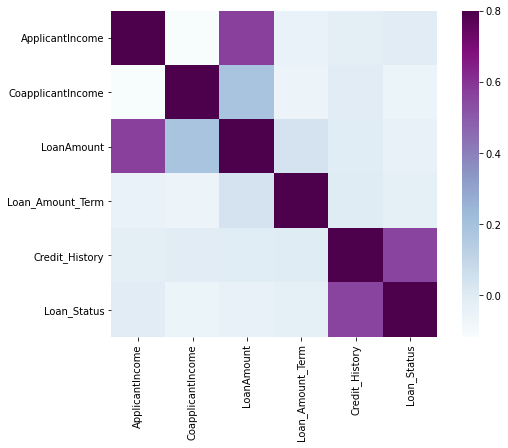

In [52]:
# correlation between all numeric variables
matrix= train.corr()
f, ax= plt.subplots(figsize= (9,6))
sns.heatmap(matrix, vmax=0.8, square= True, cmap= "BuPu")

# Missing Value Imputation
numerical variables = Mean or Median
categorical variables = Mode

In [55]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
test['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
test['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

In [56]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)

# Outlier Treatment
log transformation reduces higher values making it similar to normal distribution

<AxesSubplot:>

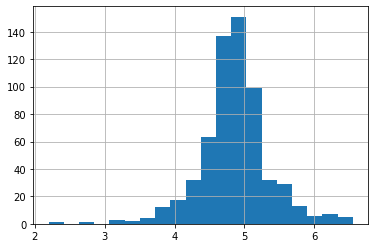

In [57]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

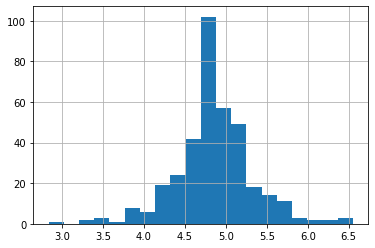

In [58]:
test['LoanAmount_log']= np.log(train['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

# Model Building
Evaluation metric will be accuracy

In [59]:
# dropping loan_id variable as it has no impact on Loan status
train= train.drop('Loan_ID', axis=1)
test= test.drop('Loan_ID', axis=1)

In [60]:
# separating target and predictor variables
X= train.drop('Loan_Status', axis=1)
y= train.Loan_Status

In [61]:
# converting categorical variables into Dummy variables
X= pd.get_dummies(X)
train= pd.get_dummies(train)
test= pd.get_dummies(test)

In [63]:
# Train-Test split
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size= 0.3)

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [66]:
pred_cv = model.predict(x_cv)

In [67]:
accuracy_score(y_cv, pred_cv)

0.7621621621621621

In [68]:
pred_test= model.predict(test)

## Logistic Regression using stratified k-folds cross-validation
Stratification keeps the same proportions of different classes of target variable in all folds

In [69]:
from sklearn.model_selection import StratifiedKFold

In [75]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.iloc[train_index],X.iloc[test_index]

    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)

    score=accuracy_score(yvl,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.7886178861788617

5 of kfold 5 
accuracy_score 0.7950819672131147


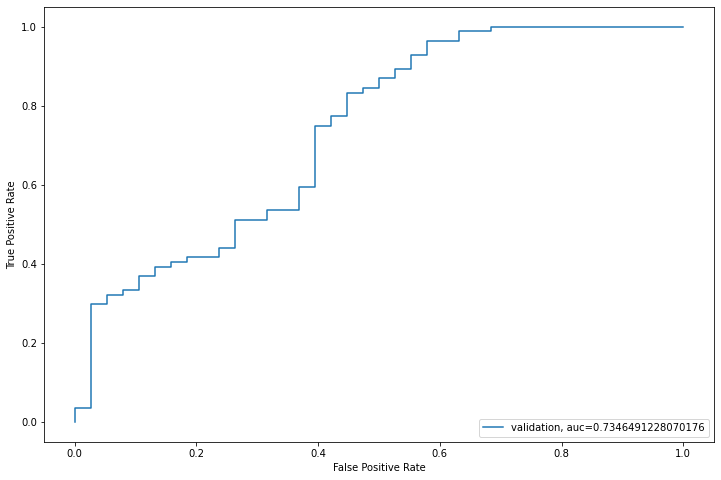

In [76]:
# ROC Curve
from sklearn import metrics
fpr, tpr, _= metrics.roc_curve(yvl, pred)
auc= metrics.roc_auc_score(yvl, pred)
plt.figure(figsize= (12,8))
plt.plot(fpr, tpr, label= 'validation, auc='+ str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Feature Engineering for improving performance
## Creating 3 new variables
Total income

EMI- LoanAmount / Loan_Amount_Term

Balance Income- Total Income - EMI

In [77]:
train['Total_Income']= train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome'] + test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

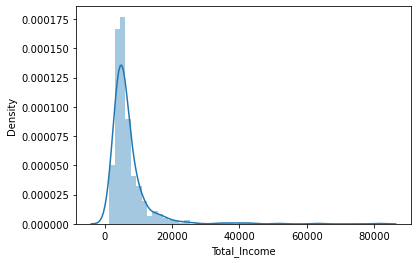

In [78]:
sns.distplot(train['Total_Income']) # Distribution of Total Income

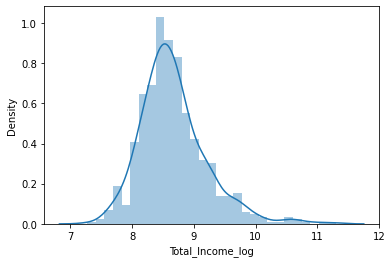

In [79]:
train['Total_Income_log']= np.log(train['Total_Income']) # Applying log normal transformation
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']= np.log(test['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

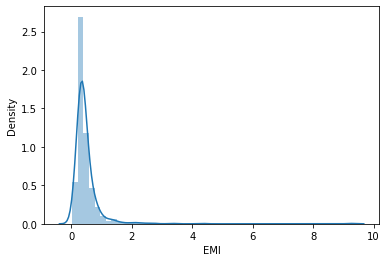

In [80]:
train['EMI']= train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI']= test['LoanAmount'] / test['Loan_Amount_Term']
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

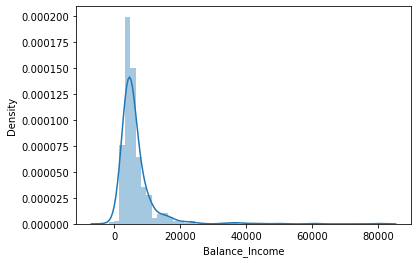

In [82]:
train['Balance_Income']= train['Total_Income'] - (train['EMI'] * 1000) # multiplied by 1000 to make units equal
test['Balance_Income']= test['Total_Income'] - (test['EMI'] * 1000)
sns.distplot(train['Balance_Income'])

In [83]:
# Dropping old variables
train= train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test= test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Rebuilding Model
*Logistic Regression
*Decision Tree
*Random Forest
*XGBoost

In [84]:
X= train.drop(['Loan_Status'], axis=1)
y= train.Loan_Status

In [86]:
# Logistic Regression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.iloc[train_index],X.iloc[test_index]

    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    model = LogisticRegression(random_state=1)

    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)

    score=accuracy_score(yvl,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5 
accuracy_score 0.7967479674796748

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.6666666666666666

4 of kfold 5 
accuracy_score 0.7804878048780488

5 of kfold 5 
accuracy_score 0.680327868852459


In [87]:
# Decision Tree
from sklearn import tree

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.iloc[train_index],X.iloc[test_index]

    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)

    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)

    score=accuracy_score(yvl,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.6991869918699187

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7073170731707317

5 of kfold 5 
accuracy_score 0.6721311475409836


In [88]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.iloc[train_index],X.iloc[test_index]

    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    model = RandomForestClassifier(random_state=1, max_depth= 10)

    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)

    score=accuracy_score(yvl,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5 
accuracy_score 0.8292682926829268

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.7723577235772358

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7540983606557377


In [90]:
# Hyper-parameter tuning for Random Forest using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Provide range for max_depth (1 to 20) with an interval of 2 and n_estimators (1 to 200) with an interval of 20
paramgrid= {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

grid_search= GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size= 0.3, random_state=1) # train-test split

grid_search.fit(x_train,y_train) # Fit optimisation model


GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [91]:
grid_search.best_estimator_ # Estimating optimised value

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [92]:
# Fitting model with best parameters
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.iloc[train_index],X.iloc[test_index]

    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    model = RandomForestClassifier(random_state=1, max_depth= 5, n_estimators=41)

    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)

    score=accuracy_score(yvl,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5 
accuracy_score 0.8211382113821138

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.7804878048780488

5 of kfold 5 
accuracy_score 0.7868852459016393


<AxesSubplot:>

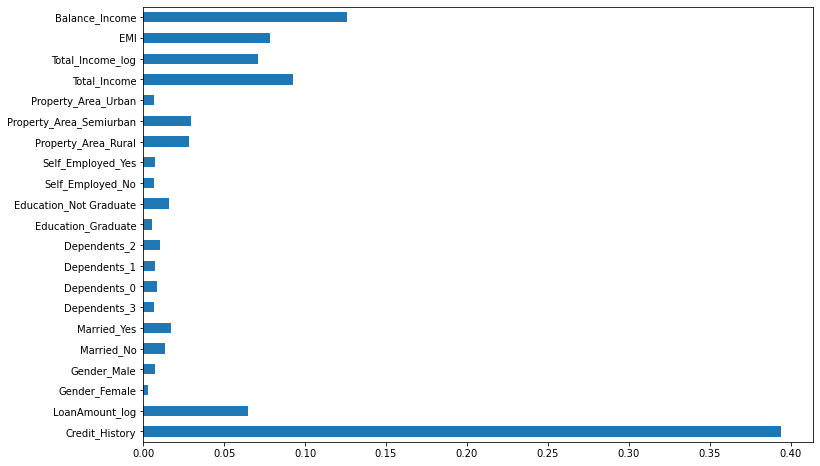

In [93]:
# Finding Feature Importance
importances= pd.Series(model.feature_importances_, index= X.columns)
importances.plot(kind='barh', figsize= (12,8))

In [98]:
# XGBoost
from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.iloc[train_index],X.iloc[test_index]

    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    model = XGBClassifier(random_state=1, max_depth= 4, n_estimators=50)

    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)

    score=accuracy_score(yvl,pred_test)

    print ('accuracy_score',score)

    i+=1

pred_test = model.predict(test)

pred = model.predict_proba(xvl)[:,1]


1 of kfold 5 
[22:28:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7804878048780488

2 of kfold 5 
[22:28:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

3 of kfold 5 
[22:28:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7642276422764228

4 of kfold 5 
[22:28:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default